In [1]:
import cv2
from datetime import datetime
import easyocr
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract
import re

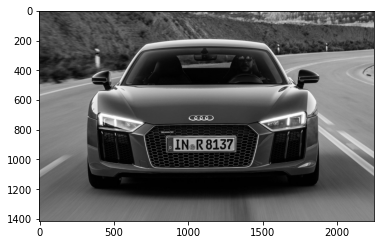

In [2]:
img = cv2.imread('car01.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

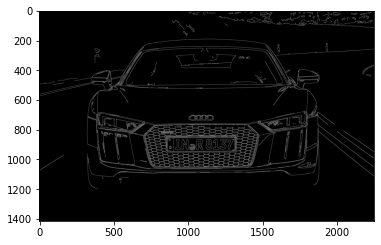

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(
    edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

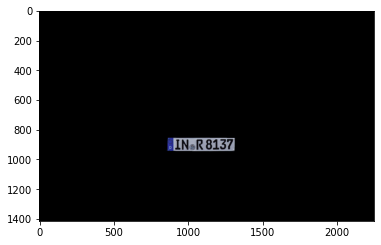

In [5]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [6]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

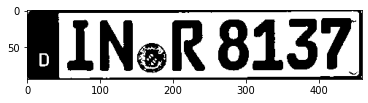

In [7]:
(thresh, blackAndWhiteFrame) = cv2.threshold(cropped_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(blackAndWhiteFrame, cv2.COLOR_BGR2RGB))

In [9]:
text = pytesseract.image_to_string(blackAndWhiteFrame)
text

'__\n\nAINsR 8137\n\x0c'

In [18]:
import re
x = re.sub("\n" and "_" and "s", "", text)
print(x)

__

AINR 8137



In [6]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


NameError: name 'cropped_image' is not defined